In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [2]:
import os
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dataset\sample.csv.csv
dataset\test.csv.csv
dataset\train.csv.csv


In [3]:
train = pd.read_csv('dataset/train.csv.csv')
test = pd.read_csv('dataset/test.csv.csv')

#  Understanding the Data

In [4]:
train.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0

In [5]:
print("Train data set dtypes: \n")
print(f"Total Cols: {len(train.columns)}")
print(f"{train.dtypes.value_counts()}")
print('-'*30)

Train data set dtypes: 

Total Cols: 14
int64      8
object     5
float64    1
dtype: int64
------------------------------


In [6]:
org_len = len(train)
train.describe()

employee_id  no_of_trainings           age  previous_year_rating  \
count  54808.000000     54808.000000  54808.000000          50684.000000   
mean   39195.830627         1.253011     34.803915              3.329256   
std    22586.581449         0.609264      7.660169              1.259993   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              3.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score  \
count       54808.000000   54808.000000  54808.000000        54808.000000   
mean            5.865512       0.351974      0.023172           63.386750   
std             4.265094       0.477590      0.150450           13.371559   
min             1.000000       0.000000      0.000000           39.000000   
25%             3.000000       0.000000      0.000000           51.000000   
50%             5.000000       0.000000      0.000000           60.000000   
75%             7.000000       1.000000      0.000000           76.000000   
max            37.000000       1.000000      1.000000           99.000000   

        is_promoted  
count  54808.000000  
mean       0.085170  
std        0.279137  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [7]:
data = go.Bar(
            x=train.isnull().sum().index,
            y=train.isnull().sum(),
            name = "Missing Values"
)

layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## Missing Values

In [8]:
data = go.Bar(
            x=train.isnull().sum().index,
            y=train.isnull().sum(),
            name = "Missing Values"
)

layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## Target Column

In [9]:
labels = train['is_promoted'].value_counts().index
values = train['is_promoted'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values,hole=0.3)])
fig.show()

### This dataset requires oversampling 

### Categorical

In [10]:
categorical = train.select_dtypes(include='object')
for col in categorical.columns:
    labels = train[col].value_counts().index
    values = train[col].value_counts()
    fig = go.Figure(data=[go.Pie(labels=labels, values=values,hole=0.3,name=col)])
    fig.show()

### Numeric

In [11]:
numeric_cols = train.select_dtypes(exclude='object')
numeric_cols = numeric_cols.drop('employee_id',axis=1)

In [12]:

fig = make_subplots(rows=4, cols=2)

traces = [
    go.Histogram(
        x=train[col], 
        nbinsx=100, 
        name=col
    ) for col in numeric_cols.columns
]

for i in range(len(traces)):
    fig.append_trace(
        traces[i], 
        (i // 2) + 1, 
        (i % 2) + 1
    )
fig.update_layout(
    title_text='Numeric_Values',
    height=900,
    width=800
)
fig.show()

 ### Outliers

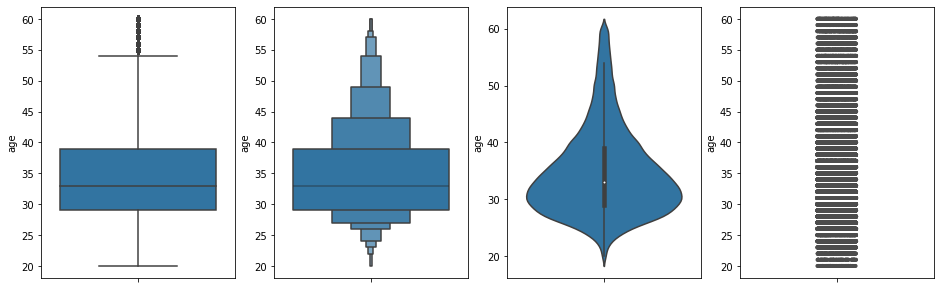

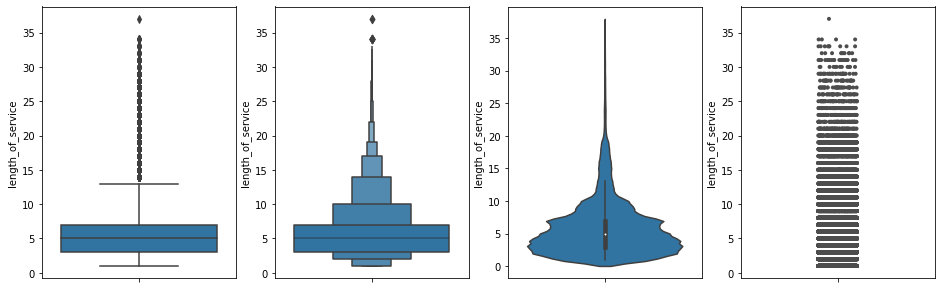

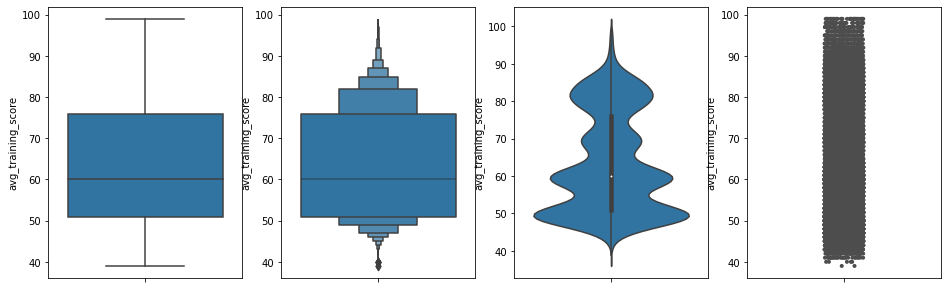

In [13]:
con_col = ['age','length_of_service','avg_training_score']
for col in con_col:
    fig, axs = plt.subplots(1, 4, figsize=(16, 5))
    sns.boxplot(y=train[col], data=train, ax=axs[0])
    sns.boxenplot(y=train[col], data=train, ax=axs[1])
    sns.violinplot(y=train[col], data=train, ax=axs[2])
    sns.stripplot(y=train[col], data=train, size=4, color=".3", linewidth=0, ax=axs[3])

## Bi-Variate Analysis

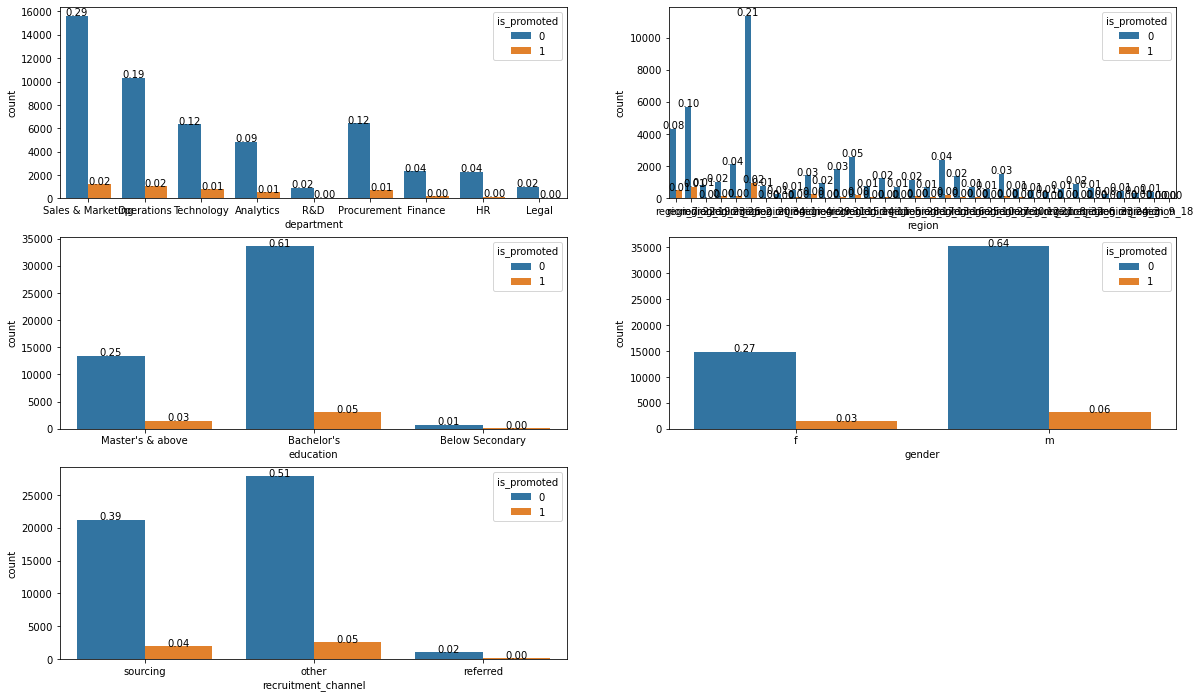

In [14]:
cols = categorical
plt.figure(figsize=(20,12))
j=0
for i in cols:
    j+=1
    plt.subplot(3,2,j)
    ax1 = sns.countplot(data=train,x= train[i],hue="is_promoted")
    #if(j==1):
    #    plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/len(train),0),
                ha="center",rotation=0) 

<AxesSubplot:>

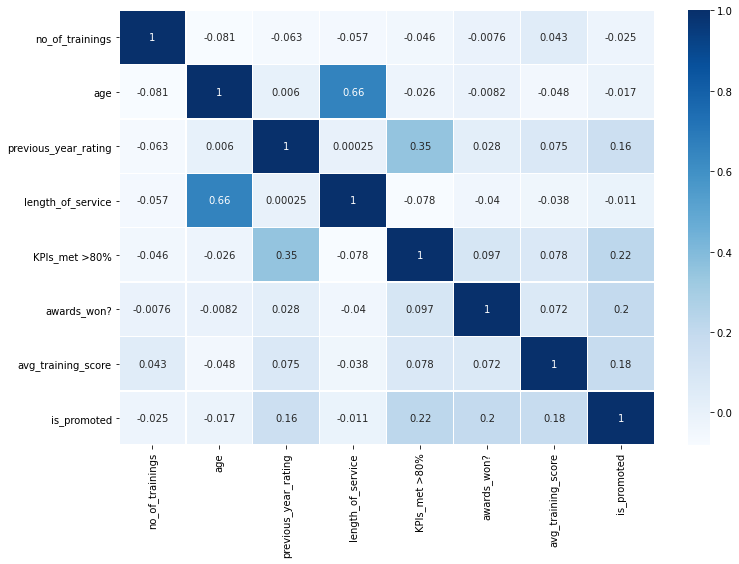

In [15]:
plt.figure(figsize=(12,8))
corr = numeric_cols.corr()
sns.heatmap(corr,cmap='Blues',linewidth=0.5,annot=True)

# Data Processing 

**Missing Values**

In [16]:
train = train.dropna()

**Outliers**

In [17]:
train = train[train['length_of_service'] < 35]

**Features**

In [18]:
mapp = {'Finance':'Analytics & Others','HR':'Analytics & Others','R&D':'Analytics & Others','Legal':'Analytics & Others','Procurement':'T&P','Technology':'T&P','Sales & Marketing':'S&M',
       'Operations':'Operations','Analytics':'Analytics & Others'}
train['department'] = train['department'].map(mapp)

In [19]:
test['department'] = test['department'].map(mapp)

In [20]:
mapp_1= {"Bachelor's":'UG & Below',"Master's & above":"Master's & above",'Below Secondary':'UG & Below'}
train['education'] = train['education'].map(mapp_1)
test['education'] = test['education'].map(mapp_1)
mapp_2= {'other':'other','sourcing':'s&r','referred':'s&r'}
test['recruitment_channel'] = test['recruitment_channel'].map(mapp_2)


In [21]:
train['age'] = pd.cut(train['age'],bins=[18,30,40,100],labels=['twenties','thirties','forty+'])
test['age'] = pd.cut(test['age'],bins=[18,30,40,100],labels=['twenties','thirties','forty+'])

In [22]:
train['length_of_service']= pd.cut(train['length_of_service'],bins=[0,5,100],labels=['<5','5+'])
test['length_of_service']= pd.cut(test['length_of_service'],bins=[0,5,100],labels=['<5','5+'])

In [23]:
train['no_of_trainings']= pd.cut(train['no_of_trainings'],bins=[0,1,100],labels=['1','2+'])
test['no_of_trainings']= pd.cut(test['no_of_trainings'],bins=[0,1,100],labels=['1','2+'])

In [24]:
train['avg_training_score'] = pd.cut(train['avg_training_score'],bins=[0,50,60,70,80,100],labels=['5','6','7','8','9+'])
test['avg_training_score'] = pd.cut(test['avg_training_score'],bins=[0,50,60,70,80,100],labels=['5','6','7','8','9+'])

In [25]:
train = train.drop('region',axis=1)
test = test.drop('region',axis=1)

**Mapping**

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
cats = [c for c in train.columns if (train[c].dtypes =='object' ) ]
print('Categories', cats)

Categories ['department', 'education', 'gender', 'recruitment_channel']


In [28]:
for c in cats:
    le=LabelEncoder()
    le.fit(list(train[c].astype('str')) + list(test[c].astype('str')))
    train[c] = le.transform(list(train[c].astype(str))) 
    test[c] = le.transform(list(test[c].astype(str))) 
train.head()

employee_id  department  education  gender  recruitment_channel  \
0        65438           2          0       0                    3   
1        65141           1          1       1                    0   
2         7513           2          1       1                    3   
3         2542           2          1       1                    0   
4        48945           3          1       1                    0   

  no_of_trainings       age  previous_year_rating length_of_service  \
0               1  thirties                   5.0                5+   
1               1  twenties                   5.0                <5   
2               1  thirties                   3.0                5+   
3              2+  thirties                   1.0                5+   
4               1    forty+                   3.0                <5   

   KPIs_met >80%  awards_won? avg_training_score  is_promoted  
0              1            0                  5            0  
1              0            0                  6            0  
2              0            0                  5            0  
3              0            0                  5            0  
4              0            0                  8            0

In [29]:
train['age'] = le.fit_transform(train['age'])
train['length_of_service'] = le.fit_transform(train['length_of_service'])
train['no_of_trainings'] = le.fit_transform(train['no_of_trainings'])
train['avg_training_score'] = le.fit_transform(train['avg_training_score'])

test['age'] = le.fit_transform(test['age'])
test['length_of_service'] = le.fit_transform(test['length_of_service'])
test['no_of_trainings'] = le.fit_transform(test['no_of_trainings'])
test['avg_training_score'] = le.fit_transform(test['avg_training_score'])

In [30]:
train = train.drop('employee_id',axis=1)
test = test.drop('employee_id',axis=1)

<AxesSubplot:>

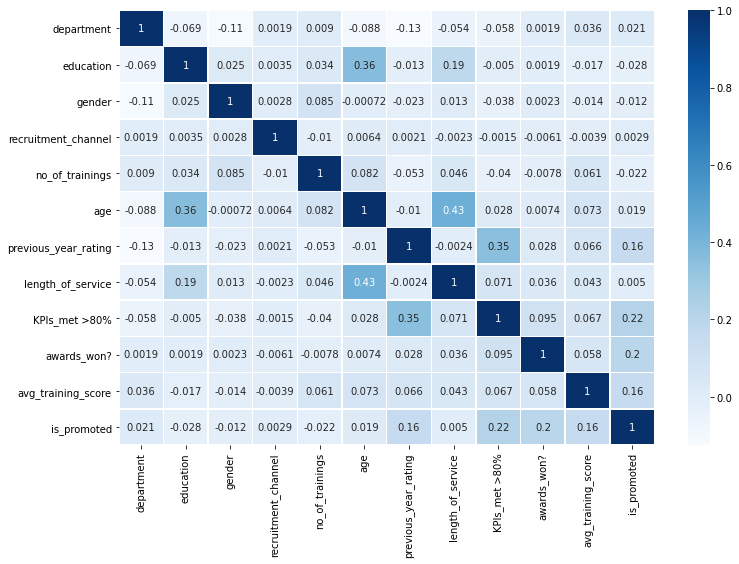

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(),cmap='Blues',linewidth=0.5,annot=True)

# Oversampling

#### OUR dataset consists of only roughly 9 percent of positive outcome. This would cause these classifiers to ignore small classes while concentrating on classifying the large ones accurately.

In [32]:
train['is_promoted'].value_counts()

0    44427
1     4232
Name: is_promoted, dtype: int64

In [34]:
from imblearn.over_sampling import SMOTE

y_train_ada =train['is_promoted']

oversampled_trainX, oversampled_trainY = SMOTE().fit_resample(train.drop(['is_promoted'],axis=1), y_train_ada)

In [35]:
oversampled_trainY.value_counts()

1    44427
0    44427
Name: is_promoted, dtype: int64

In [37]:
X_train = oversampled_trainX
y_train = oversampled_trainY

## Scaling 

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# PCA

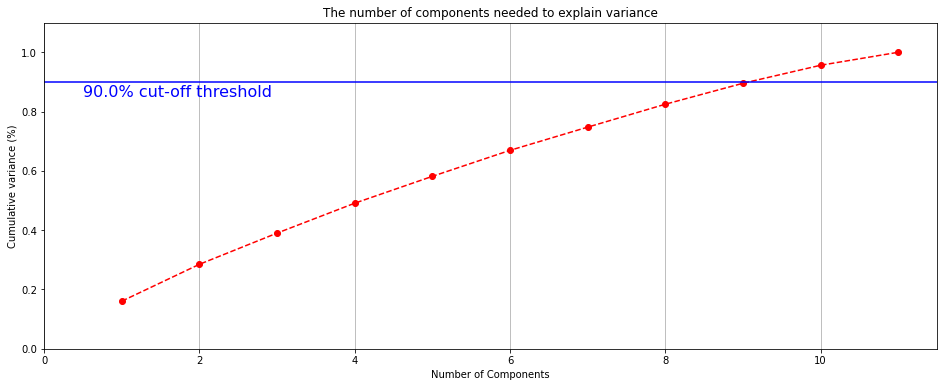

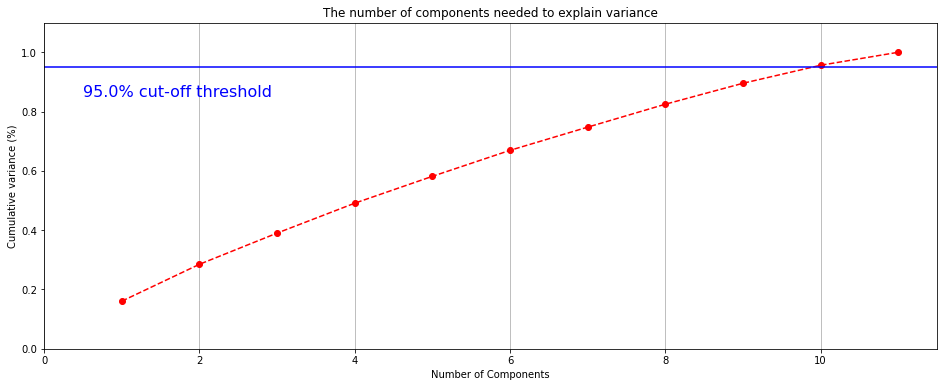

In [39]:
def plot_PCA(threshold, data_scaled):
    pca= PCA().fit(data_scaled)
    
    fig, ax = plt.subplots(figsize=(16,6))
    y = np.cumsum(pca.explained_variance_ratio_)
    xi = np.arange(1, len(y)+1, step=1)
    
    plt.ylim(0.0,1.1)
    plt.plot(xi, y, marker='o', linestyle='--', color='r')
    
    plt.xlabel('Number of Components')
    plt.xticks(np.arange(0, len(y), step=2))
    
    plt.ylabel('Cumulative variance (%)')
    plt.title('The number of components needed to explain variance')
    
    plt.axhline(y=threshold, color='b', linestyle='-')
    plt.text(0.5, 0.85, f'{threshold*100}% cut-off threshold', color = 'blue', fontsize=16)
    
    ax.grid(axis='x')
    fig.savefig(f"PCA_threshold_{threshold*100}p.png")
    plt.show()

thresholds = [0.90, 0.95]

for th in thresholds:
    plot_PCA(th, X_train_scaled)

In [40]:
print("PCA")
chosen_threshold = 0.90
n_components = 9

pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(X_train_scaled)
principal_df = pd.DataFrame(data=principalComponents)

print(f"PCA Explained Variance Ratio:\n{pca.explained_variance_ratio_}")
print('-'*30)
print(f"PCA Singular Values:\n{pca.singular_values_}")
print('-'*30)
principal_df.head()

PCA
PCA Explained Variance Ratio:
[0.16075603 0.12428513 0.10516681 0.10088653 0.09056486 0.08765912
 0.07820386 0.07726632 0.07069369]
------------------------------
PCA Singular Values:
[396.38615018 348.53340947 320.60788166 314.01575196 297.51899659
 292.70719191 276.47059073 274.80835873 262.86040047]
------------------------------


0         1         2         3         4         5         6  \
0  1.600990  1.284716 -0.513014 -1.695269  0.890079 -0.467214  0.018841   
1 -1.773177 -0.069658 -0.634543 -0.163803 -0.962899  0.754259 -0.262715   
2  0.336804 -1.509645 -0.622496 -0.897091  1.104763  0.678135  0.435662   
3 -0.015233 -3.287108 -0.364551  0.570513 -0.814573 -0.685656  1.107188   
4  0.308476 -0.903779  1.050539  0.306313 -0.740493  0.293208  0.582913   

          7         8  
0  1.103565 -0.227870  
1 -0.545083 -0.125313  
2 -0.315074  1.065379  
3  1.268887  1.058567  
4 -1.305128 -0.027717

# Modelling

In [41]:
import xgboost as xgb

## Tuning

In [42]:
import optuna
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 350, 1000),
        'max_depth': trial.suggest_int('max_depth', 6, 13),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.009, 0.10),
        'subsample': trial.suggest_uniform('subsample', 0.50, 1),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.50, 1),
        'gamma': trial.suggest_int('gamma', 0, 0.05),
        'missing': None,
        #'tree_method':'gpu_hist'
        
       }
        
    clf = xgb.XGBClassifier(**params)
    scores = []
    X_train_k = principal_df.values
    y_train_k = y_train.values
    kf = StratifiedKFold(n_splits=3)
    for train_idx, valid_idx in kf.split(X_train_k,y_train_k):
#        X_train_k, X_test = X_train[train_index], X_train[test_index]
#        y_train_k, y_test = y_train[train_index], y_train[test_index]
        train_data = X_train_k[train_idx, :], y_train_k[train_idx]
        valid_data = X_train_k[valid_idx, :], y_train_k[valid_idx]
        
        clf.fit(X_train_k[train_idx, :], y_train_k[train_idx])
        pred = clf.predict(X_train_k[valid_idx, :])
        accuracy = f1_score(y_train_k[valid_idx],pred)
        scores.append(accuracy)
    print(f'Trial done: Accuracy values on folds: {scores}')
    return np.average(scores)

In [46]:
# For less computing time I have set the trial to 5, it can be adjusted.
n_trials = 5

FIT_XGB = True

if FIT_XGB:
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2021-01-01 11:10:08,350] A new study created in memory with name: no-name-15e623c9-e476-43a5-9faf-3ed053b3fb32
C:\Users\aruna\anaconda3\lib\site-packages\optuna\distributions.py:566: UserWarning:

The distribution is specified by [0, 0.05] and step=1, but the range is not divisible by `step`. It will be replaced by [0, 0.0].

C:\Users\aruna\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:10:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:11:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:12:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-01-01 11:13:29,892] Trial 0 finished with value: 0.8536077930029959 and parameters: {'n_estimators': 583, 'max_depth': 12, 'learning_rate': 0.09045720567761821, 'subsample': 0.5675571665078762, 'colsample_bytree': 0.7498475101894291, 'gamma': 0}. Best is trial 0 with value: 0.8536077930029959.


Trial done: Accuracy values on folds: [0.8486886348352387, 0.8561438876114278, 0.8559908565623214]
[11:13:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aruna\anaconda3\lib\site-packages\optuna\distributions.py:566: UserWarning:

The distribution is specified by [0, 0.05] and step=1, but the range is not divisible by `step`. It will be replaced by [0, 0.0].

C:\Users\aruna\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:13:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:13:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-01-01 11:14:12,029] Trial 1 finished with value: 0.8450912806585684 and parameters: {'n_estimators': 541, 'max_depth': 7, 'learning_rate': 0.03544246438300261, 'subsample': 0.7639692195074096, 'colsample_bytree': 0.7861262380823121, 'gamma': 0}. Best is trial 0 with value: 0.8536077930029959.


Trial done: Accuracy values on folds: [0.8419750737322804, 0.8442463431477181, 0.8490524250957066]
[11:14:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aruna\anaconda3\lib\site-packages\optuna\distributions.py:566: UserWarning:

The distribution is specified by [0, 0.05] and step=1, but the range is not divisible by `step`. It will be replaced by [0, 0.0].

C:\Users\aruna\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:14:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-01-01 11:14:50,303] Trial 2 finished with value: 0.8512383389041954 and parameters: {'n_estimators': 536, 'max_depth': 7, 'learning_rate': 0.08861437462695983, 'subsample': 0.7777080257277724, 'colsample_bytree': 0.8741516058549302, 'gamma': 0}. Best is trial 0 with value: 0.8536077930029959.


Trial done: Accuracy values on folds: [0.8470460427517014, 0.8530838530838533, 0.8535851208770319]
[11:14:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aruna\anaconda3\lib\site-packages\optuna\distributions.py:566: UserWarning:

The distribution is specified by [0, 0.05] and step=1, but the range is not divisible by `step`. It will be replaced by [0, 0.0].

C:\Users\aruna\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:15:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:15:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-01-01 11:16:19,050] Trial 3 finished with value: 0.8534085245948666 and parameters: {'n_estimators': 837, 'max_depth': 8, 'learning_rate': 0.08263155099201226, 'subsample': 0.5890267311911714, 'colsample_bytree': 0.6490920341680655, 'gamma': 0}. Best is trial 0 with value: 0.8536077930029959.


Trial done: Accuracy values on folds: [0.849964930179175, 0.8551403337838263, 0.8551203098215986]
[11:16:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aruna\anaconda3\lib\site-packages\optuna\distributions.py:566: UserWarning:

The distribution is specified by [0, 0.05] and step=1, but the range is not divisible by `step`. It will be replaced by [0, 0.0].

C:\Users\aruna\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:16:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:16:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-01-01 11:16:45,202] Trial 4 finished with value: 0.8419256160336204 and parameters: {'n_estimators': 385, 'max_depth': 7, 'learning_rate': 0.04544289746332068, 'subsample': 0.8346377196738388, 'colsample_bytree': 0.542739025388892, 'gamma': 0}. Best is trial 0 with value: 0.8536077930029959.


Trial done: Accuracy values on folds: [0.8383991894630192, 0.8421151321957622, 0.8452625264420799]
Number of finished trials: 5
Best trial:
  Value: 0.8536077930029959
  Params: 
    n_estimators: 583
    max_depth: 12
    learning_rate: 0.09045720567761821
    subsample: 0.5675571665078762
    colsample_bytree: 0.7498475101894291
    gamma: 0


In [47]:
best_param = study.best_params
#best_param['tree_method'] = 'gpu_hist'

In [48]:
best_param_tmp ={'n_estimators': 818,
 'max_depth': 13,
 'learning_rate': 0.08746985629136615,
 'subsample': 0.7811931806150265,
 'colsample_bytree': 0.9529767506866944,
 'gamma': 0,
 'tree_method': 'gpu_hist'}

## Visualization

In [49]:
import plotly
optuna.visualization.plot_slice(study)

In [50]:
optuna.visualization.plot_optimization_history(study)

## Fitting 

In [51]:
model = xgb.XGBClassifier(**best_param_tmp)
model.fit(principal_df,y_train)

[11:18:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9529767506866944, gamma=0,
              gpu_id=0, importance_type='gain', interaction_constraints='',
              learning_rate=0.08746985629136615, max_delta_step=0, max_depth=13,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=818, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.7811931806150265, tree_method='gpu_hist',
              validate_parameters=1, verbosity=None)

In [52]:
test.previous_year_rating.fillna(3.0,inplace=True)

In [53]:
test_scaled = scaler.transform(test)
principalComponents = pca.transform(test_scaled)
principal_test = pd.DataFrame(data=principalComponents)

In [54]:
predictions_final = model.predict(principal_test)

In [55]:
predictions_final

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [ ]:
#import joblib
#joblib.dump(model,"XGB_HR")

In [ ]:
#t = pd.read_csv('dataset/test.csv.csv')

In [ ]:
#submission = pd.DataFrame({
#        "employee_id": t["employee_id"],
#        "is_promoted":predictions_final
#    })
#submission.to_csv('XGB_HR(0).csv', index=False)